<a href="https://colab.research.google.com/github/linhv0/My-Data-Analysis-Small-Projects/blob/main/Python_event_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigate how Super Bowl impact stock prices

In [1]:

from google.colab import files
files.upload()

Saving event study data python.xlsx to event study data python.xlsx


{'event study data python.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00b\xee\x9dh^\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [2]:

import pandas as pd
import numpy as np
import scipy.stats as stats

t = pd.read_excel('event study data python.xlsx')
t.head()


,time,Amazon,Amex,Apple,ATT,BestBuy,Budweiser,Campbell,CarnivalCruise,CharlesSchwabb,...,Sears,Sketchers,Sprint,Staples,Target,Turbotax,Underarmour,Walmart,Wendys,Xerox
0,-200,0.003181,-0.023411,-0.015306,-0.006250,0.007593,0.006838,0.009259,0.008835,-0.074093,...,-0.006757,0.022168,-0.020244,-0.027965,-0.006835,0.012829,0.067804,-0.003754,0.027027,-0.030242
1,-199,-0.003913,0.000000,-0.025907,-0.029350,-0.020367,0.001698,0.011009,0.021346,-0.111595,...,-0.006803,0.002892,-0.011696,0.031433,0.010983,-0.002169,0.001279,0.003654,-0.052632,-0.012474
2,-198,0.009883,0.008219,0.000000,-0.008639,-0.012474,0.003390,0.014519,-0.002412,0.046569,...,0.000000,-0.022345,-0.006706,-0.016012,0.000869,0.003705,-0.008512,-0.010354,0.000000,-0.012632
3,-197,0.000231,-0.013699,0.053191,-0.004357,0.151579,-0.006757,-0.023256,0.003760,0.105386,...,-0.003425,-0.009585,-0.013106,0.022047,0.008538,0.000492,0.003434,-0.010117,-0.027778,-0.040512
4,-196,0.001840,0.006944,-0.010101,-0.017505,-0.012797,0.000000,-0.018315,0.001338,0.023835,...,-0.065292,-0.002730,0.007243,0.002054,0.000287,-0.004624,-0.041711,0.004994,0.057143,-0.011111


In [29]:
# Standardized Cumulative Abnormal Returns for Event window and Estimation window
scaar_event = []
scaar_estimation= []

In [30]:
for i in range(1,43):
  estimation_ret = t.iloc[0:196,i:i+1] # return from estimation window
  estimation_mean = np.mean(estimation_ret) #average return from estimation window

  event_ret = t.iloc[196:205,i:i+1] # return during event window [-4:4]
  ab = event_ret - estimation_mean # abnormal return
  caar = np.mean(ab) #calculate cumulative average abnormal return

  #std from event window
  event_std = np.std(ab,ddof=1)
  scaar_event_std = caar/(event_std/np.sqrt(len(event_ret)))
  scaar_event.append(scaar_event_std)

  #std from estimation window
  estimation_std = np.std(estimation_ret,ddof=1)
  scaar_estimation_std = caar/(estimation_std/np.sqrt(len(event_ret)))
  scaar_estimation.append(scaar_estimation_std)

print(scaar_event)










[Amazon   -0.819244
dtype: float64, Amex   -1.254753
dtype: float64, Apple   -0.450207
dtype: float64, ATT   -0.259702
dtype: float64, BestBuy   -0.89349
dtype: float64, Budweiser    0.316458
dtype: float64, Campbell   -0.264026
dtype: float64, CarnivalCruise   -3.174911
dtype: float64, CharlesSchwabb    0.424163
dtype: float64, Comcast   -0.882361
dtype: float64, Dell   -0.600618
dtype: float64, Doordash    0.314346
dtype: float64, DraftKing    0.446307
dtype: float64, Etrade   -0.643434
dtype: float64, Exxon   -0.61541
dtype: float64, Facebook   -0.204344
dtype: float64, Fedex    0.814574
dtype: float64, Ford    1.033089
dtype: float64, Gildan   -1.951205
dtype: float64, Gillette    0.398009
dtype: float64, Goodyear    2.247735
dtype: float64, HRBlock    1.17934
dtype: float64, HomeDepot   -0.852404
dtype: float64, IBM   -0.645318
dtype: float64, Kellogg    0.537237
dtype: float64, McDonald   -0.058605
dtype: float64, Motorola   -0.839429
dtype: float64, Nike   -1.460314
dtype: float

In [31]:
print(scaar_estimation)

[Amazon   -1.735198
dtype: float64, Amex   -0.886032
dtype: float64, Apple   -0.476073
dtype: float64, ATT   -0.240823
dtype: float64, BestBuy   -0.626524
dtype: float64, Budweiser    0.271569
dtype: float64, Campbell   -0.221285
dtype: float64, CarnivalCruise   -2.187813
dtype: float64, CharlesSchwabb    0.329824
dtype: float64, Comcast   -0.655107
dtype: float64, Dell   -0.575592
dtype: float64, Doordash    0.370674
dtype: float64, DraftKing    0.390412
dtype: float64, Etrade   -0.351246
dtype: float64, Exxon   -0.627627
dtype: float64, Facebook   -0.378154
dtype: float64, Fedex    1.305322
dtype: float64, Ford    1.248022
dtype: float64, Gildan   -1.724082
dtype: float64, Gillette    0.251844
dtype: float64, Goodyear    2.025018
dtype: float64, HRBlock    0.674614
dtype: float64, HomeDepot   -0.674442
dtype: float64, IBM   -0.551907
dtype: float64, Kellogg    0.627359
dtype: float64, McDonald   -0.083689
dtype: float64, Motorola   -1.292287
dtype: float64, Nike   -1.736887
dtype: fl

In [32]:
mean_scaar_event = np.mean(scaar_event)
std_scaar_event = np.std(scaar_event,ddof=1)
t_event = mean_scaar_event/(std_scaar_event/np.sqrt(42))

print('overall mean SCAAR using the event window std:', mean_scaar_event)
print('overall std (std of normalized CAAR) using the event window std:', std_scaar_event)
print('t-statistic using the event window std:', t_event)

overall mean SCAAR using the event window std: -0.16849310594547925
overall std (std of normalized CAAR) using the event window std: 1.0470680428148096
t-statistic using the event window std: -1.0428740869280309


In [33]:
mean_scaar_estimation = np.mean(scaar_estimation)
std_scaar_estimation = np.std(scaar_estimation,ddof=1)
t_estimation = mean_scaar_estimation/(std_scaar_estimation/np.sqrt(42))

print('overall mean SCAAR using the estimation window std:', mean_scaar_estimation)
print('overall std (std of normalized CAAR) using the estimation window std:', std_scaar_estimation)
print('t-statistic using the estimation window std:', t_estimation)

overall mean SCAAR using the estimation window std: -0.21585017012883181
overall std (std of normalized CAAR) using the estimation window std: 1.105001054911254
t-statistic using the estimation window std: -1.265943571813629


We performed two t-tests on the SCAAR, using the standard deviations from the event window (-1.0429) and the estimation window (-1.2659), to assess whether the abnormal returns were significantly different from normal market behavior. With a 5% significance level, both t-statistics were below the threshold for statistical significance. Although the negative signs suggest a negative abnormal return, the magnitudes indicate that the results are not significant


In [34]:
dof = 41
p = 2*stats.t.sf(abs(t_event),dof)
print(p)


0.3031170180093328


We do not reject the null hypothesis at the 5% significance level, concluding that the event does not result in abnormal returns. This contradicts our original hypothesis, which predicted significant positive returns driven by retail investors’ excitement and the signal of good financial health to sophisticated investors. As a 2009 study by Chang, Jiang, and Kim suggests, the “likeability” of an ad may play a significant role, warranting further investigation, especially with our approach to correct clustering. Another possible explanation for our results is that the high cost of producing an ad and securing Super Bowl ad airtime may offset any potential positive impact on stock returns. Further research should also explore the effect of the number of ads run by individual companies, as some firms aired multiple ads during the broadcast.


*We recommend that portfolio managers avoid making trades based solely on whether a company airs a Super Bowl advertisement. Our event study findings suggest that there is no significant impact on stock market returns from running a Super Bowl ad.*

In [ ]:
#for visualization
all_abnormal_returns = pd.DataFrame()

for i in range(1,43):
  estimation_ret = t.iloc[0:196,i:i+1] # return from estimation window
  estimation_mean = np.mean(estimation_ret) #average return from estimation window

  event_ret_16days = t.iloc[196:,i:i+1] # return during event window [-4:11]
  ab_return = event_ret_16days - estimation_mean # abnormal return

#group data based on index and take the average
  ab_return.columns = ['AbnormalReturn']
  ab_return['Company'] = f'Company_{i}'
  ab_return['EventDay'] = ab_return.index - 200  # Label days as -4 to +4 relative to event

# Append to the overall DataFrame
  all_abnormal_returns = pd.concat([all_abnormal_returns, ab_return])

print(all_abnormal_returns)

average_abnormal_return = all_abnormal_returns.groupby('EventDay')['AbnormalReturn'].mean()

print(average_abnormal_return)


     AbnormalReturn     Company  EventDay
196        0.011782   Company_1        -4
197        0.006666   Company_1        -3
198       -0.044392   Company_1        -2
199        0.026317   Company_1        -1
200       -0.030362   Company_1         0
..              ...         ...       ...
207        0.009069  Company_42         7
208       -0.015510  Company_42         8
209        0.011392  Company_42         9
210       -0.015580  Company_42        10
211       -0.004466  Company_42        11

[672 rows x 3 columns]
EventDay
-4    -0.009081
-3     0.001317
-2    -0.003217
-1    -0.007146
 0    -0.002780
 1     0.003043
 2     0.004158
 3     0.001130
 4     0.005888
 5    -0.000736
 6    -0.000804
 7     0.006669
 8     0.000130
 9    -0.002020
 10    0.000225
 11   -0.000385
Name: AbnormalReturn, dtype: float64


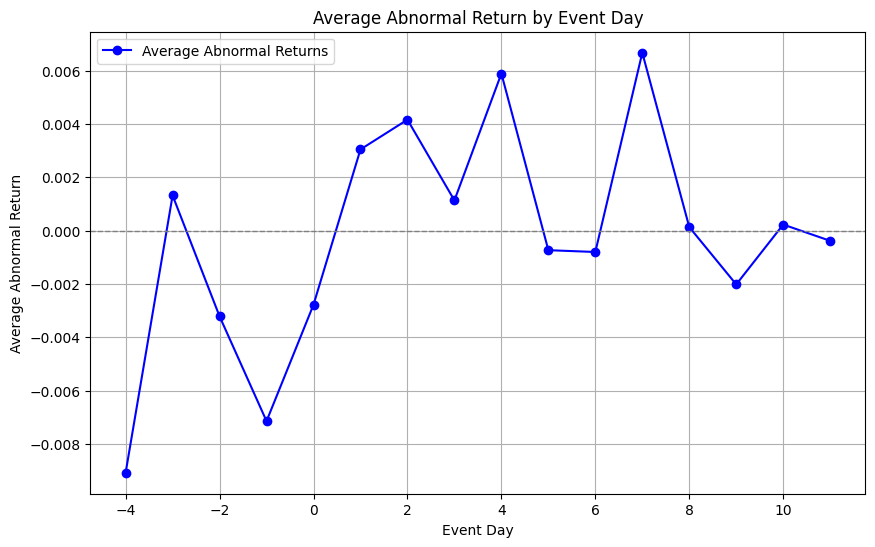

In [ ]:
import matplotlib.pyplot as plt

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(average_abnormal_return.index, average_abnormal_return.values, marker='o', color='blue', label='Average Abnormal Returns')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

plt.title('Average Abnormal Return by Event Day')
plt.xlabel('Event Day')
plt.ylabel('Average Abnormal Return')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
cumulative_abnormal_return = []
cumulative_sum = 0  # Variable to hold the running total

# Loop through each abnormal return and calculate cumulative sum
for return_value in average_abnormal_return:
    cumulative_sum += return_value  # Add the current abnormal return to cumulative sum
    cumulative_abnormal_return.append(cumulative_sum)  # Append the cumulative sum to the list

# Convert the list to a pandas Series (optional) and match it with the index of average abnormal returns
cumulative_abnormal_return = pd.Series(cumulative_abnormal_return, index=average_abnormal_return.index)

# Display the cumulative abnormal return Series
print(cumulative_abnormal_return)


EventDay
-4    -0.009081
-3    -0.007764
-2    -0.010982
-1    -0.018128
 0    -0.020908
 1    -0.017865
 2    -0.013707
 3    -0.012576
 4    -0.006688
 5    -0.007424
 6    -0.008228
 7    -0.001559
 8    -0.001429
 9    -0.003449
 10   -0.003224
 11   -0.003608
dtype: float64


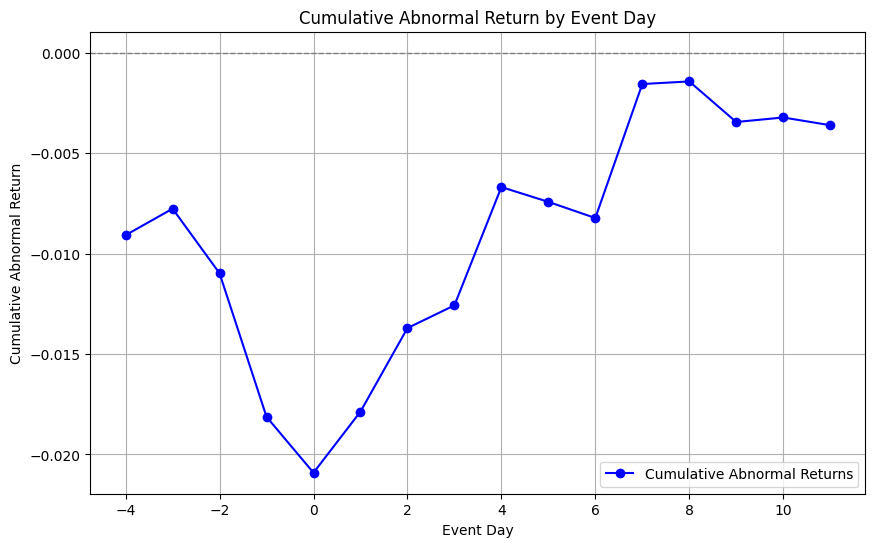

In [ ]:
# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(cumulative_abnormal_return.index, cumulative_abnormal_return.values, marker='o', color='blue', label='Cumulative Abnormal Returns')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

plt.title('Cumulative Abnormal Return by Event Day')
plt.xlabel('Event Day')
plt.ylabel('Cumulative Abnormal Return')
plt.legend()
plt.grid(True)
plt.show()